In [2]:
# Packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib notebook
sns.set_style("darkgrid")

In [3]:
# Loading dataset.
with open('session_mcs_list_all.pickle', 'rb') as handle:
    my_list = pickle.load(handle)

'''fn = 'session_start_end_time_top_rnti.pickle'
with open(fn, 'rb') as handle:
    df_session = pickle.load(handle)'''

"fn = 'session_start_end_time_top_rnti.pickle'\nwith open(fn, 'rb') as handle:\n    df_session = pickle.load(handle)"

In [4]:
# Removing NaNs or empty values from the initial dataset
dataset = []
for sess in my_list:
    if len(sess) != 0:
        if ~np.isnan(np.sum(sess)):
            dataset.append(sess)

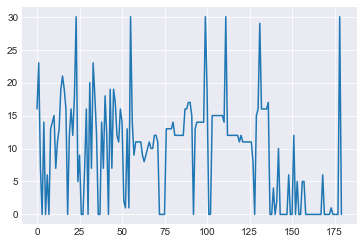

In [5]:
# Figure: plotting an example session trace
plt.figure()
plt.plot(my_list[1172])

In [6]:
#  Extracting features: session length, avg_tbs, std_tbs, total sent TBS
# Building a py list with session lengths (number of samples)
sess_length = []
sess_avg_tbs = []
sess_std_tbs = []
sess_tot_tbs = []
sess_med_tbs = []
sess_skew_tbs = []  #  measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
sess_kurtosis_tbs = [] # measure of the "tailedness" of the probability distribution of a real-valued random variable
sess_min_tbs = []
sess_max_tbs = []
sess_var_tbs = []
sess_perc_10 = []
sess_perc_20 = []
sess_perc_30 = []
sess_perc_40 = []
sess_perc_50 = []
sess_perc_60 = []
sess_perc_70 = []
sess_perc_80 = []
sess_perc_90 = []

for sess in dataset:
    sess_length.append(len(sess))
    sess_avg_tbs.append(np.mean(sess))
    sess_std_tbs.append(np.std(sess))
    sess_tot_tbs.append(sum(sess))
    sess_med_tbs.append(np.median(sess))
    sess_skew_tbs.append(skew(sess))
    sess_kurtosis_tbs.append(kurtosis(sess))
    sess_min_tbs.append(np.min(sess))
    sess_max_tbs.append(np.max(sess))
    sess_var_tbs.append(np.var(sess))
    sess_perc_10.append(np.percentile(sess, 10))
    sess_perc_20.append(np.percentile(sess, 20))
    sess_perc_30.append(np.percentile(sess, 30))
    sess_perc_40.append(np.percentile(sess, 40))
    sess_perc_50.append(np.percentile(sess, 50))
    sess_perc_60.append(np.percentile(sess, 60))
    sess_perc_70.append(np.percentile(sess, 70))
    sess_perc_80.append(np.percentile(sess, 80))
    sess_perc_90.append(np.percentile(sess, 90))
    
# Creating the dataFrame
features = {'sess_length': sess_length, 'sess_avg_tbs': sess_avg_tbs, 'sess_std_tbs':sess_std_tbs, 
            'sess_tot_tbs':sess_tot_tbs, 'sess_med_tbs':sess_med_tbs, 'sess_skew_tbs':sess_skew_tbs, 'sess_kurtosis_tbs':sess_kurtosis_tbs,
           'sess_min_tbs':sess_min_tbs, 'sess_max_tbs':sess_max_tbs, 'sess_var_tbs':sess_var_tbs, 'sess_perc_10':sess_perc_10, 'sess_perc_20':sess_perc_20,
           'sess_perc_30':sess_perc_30, 'sess_perc_40':sess_perc_40, 'sess_perc_50':sess_perc_50, 'sess_perc_60':sess_perc_60, 'sess_perc_70':sess_perc_70,
           'sess_perc_80':sess_perc_80, 'sess_perc_90':sess_perc_90}
df_features = pd.DataFrame(data=features)
    

In [7]:
df_features

,sess_length,sess_avg_tbs,sess_std_tbs,sess_tot_tbs,sess_med_tbs,sess_skew_tbs,sess_kurtosis_tbs,sess_min_tbs,sess_max_tbs,sess_var_tbs,sess_perc_10,sess_perc_20,sess_perc_30,sess_perc_40,sess_perc_50,sess_perc_60,sess_perc_70,sess_perc_80,sess_perc_90
0,1,0.000000,0.000000,0.0,0.0,0.000000,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8.000000,0.000000,8.0,8.0,0.000000,-3.000000,8.0,8.0,0.000000,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,1,20.000000,0.000000,20.0,20.0,0.000000,-3.000000,20.0,20.0,0.000000,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
3,1,17.000000,0.000000,17.0,17.0,0.000000,-3.000000,17.0,17.0,0.000000,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
4,1,15.000000,0.000000,15.0,15.0,0.000000,-3.000000,15.0,15.0,0.000000,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
5,1,23.000000,0.000000,23.0,23.0,0.000000,-3.000000,23.0,23.0,0.000000,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
6,1,0.000000,0.000000,0.0,0.0,0.000000,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,25.000000,0.000000,25.0,25.0,0.000000,-3.000000,25.0,25.0,0.000000,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
8,1,28.000000,0.000000,28.0,28.0,0.000000,-3.000000,28.0,28.0,0.000000,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
9,1,17.000000,0.000000,17.0,17.0,0.000000,-3.000000,17.0,17.0,0.000000,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0


## __PLOTTING__

Text(0.5,1,'Average length:51.02')

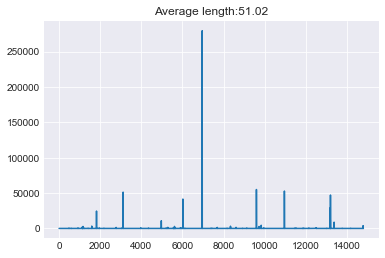

In [8]:
# Figure: plotting the length of each session
plt.figure()
plt.plot(sess_length)
plt.title('Average length:'+ str(round(np.mean(sess_length),2 ) ) )

# histogram
#plt.figure()
#plt.hist(sess_length, range=(np.min(sess_length), np.max(sess_length) ) )
#plt.title('Average length:'+ str(round(np.mean(sess_length),2 ) ) )


Text(0.5,1,'Average TBS:14.0')

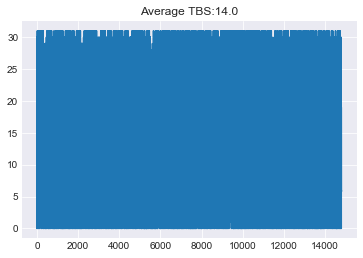

In [9]:
# Figure: plotting the Transpot Block Size (Packet size) -> Data rate
plt.figure()
plt.plot(sess_avg_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_avg_tbs) ) ) )

# histogram
#plt.figure()
#plt.hist(sess_avg_tbs, range=(np.min(sess_avg_tbs), np.max(sess_avg_tbs) ) )
#plt.title('Average TBS:'+ str(round(np.mean(sess_avg_tbs) ) ) )

Text(0.5,1,'Average TBS:1.0')

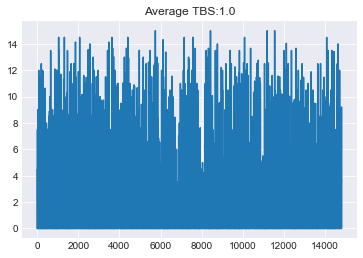

In [10]:
# Figure: plotting the std TBS
plt.figure()
plt.plot(sess_std_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_std_tbs) ) ) )

Text(0.5,1,'Average TBS:300.0')

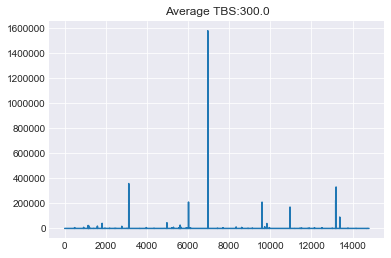

In [11]:
# Figure: plotting the total sent TBS
plt.figure()
plt.plot(sess_tot_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_tot_tbs) ) ) )

## __CLUSTERING__

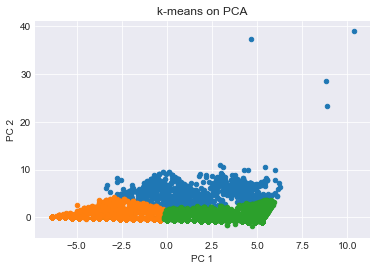

In [12]:
# Computing k-means on the feature vector

# Standardizing the features
x = StandardScaler().fit_transform(df_features)
#x = df_features

# k-means
num_cluster = 3
est = KMeans(n_clusters=num_cluster)
est.fit(x)
df_features['labels'] = est.labels_

# Computing k-means on PCA over the feature vector

# PCA
#x = df_features
n_comps = 9
pca = PCA(n_components=n_comps)
principalComponents = pca.fit_transform(x)
cols = ['pc' + str(ind+1) for ind in range(n_comps)]
df_pca = pd.DataFrame(data = principalComponents, columns = cols)

# k-means
est_pca = KMeans(n_clusters=num_cluster)
est_pca.fit(df_pca)
labels_pca = est_pca.labels_
df_pca['labels'] = labels_pca

# plot
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('k-means on PCA')

for ind in set(df_pca['labels']):
    indicesToKeep = df_pca['labels'] == ind
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
                   , df_pca.loc[indicesToKeep, 'pc2']
                   , s = 20
                   )

In [18]:
#print(df_features.index[df_features['labels'] == 0].tolist())

res = df_features[df_features['labels'] == 2]
print(len(res)/len(df_features))
np.mean(res)


0.05614106201864613


sess_length           883.716005
sess_avg_tbs           10.071059
sess_std_tbs            8.764159
sess_tot_tbs         5080.687124
sess_med_tbs            8.586041
sess_skew_tbs           0.980429
sess_kurtosis_tbs       1.627154
sess_min_tbs            2.416366
sess_max_tbs           26.036101
sess_var_tbs           83.441123
sess_perc_10            3.430205
sess_perc_20            4.512154
sess_perc_30            5.738267
sess_perc_40            7.084958
sess_perc_50            8.586041
sess_perc_60           10.149699
sess_perc_70           12.036101
sess_perc_80           14.612756
sess_perc_90           18.539110
labels                  2.000000
dtype: float64